## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load the Dataset

The Titanic dataset is loaded using Pandas for analysis.

In [4]:
data = pd.read_csv("/Users/k.manjunadh/Documents/titanic-survival-analysis/ data/raw/titanic.csv")

In [5]:
titanic = pd.DataFrame(data)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3. Data Overview

This section explores the basic structure of the dataset, including its dimensions, columns, data types, and summary statistics.


In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


titanic.info()

## 4. Data Quality Checks

Before proceeding with analysis, data quality checks were performed to identify missing values, duplicate records, and verify data types.

### 4.1 Missing Values Check

This step identifies missing values across all columns to determine which variables require cleaning or imputation.

In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The dataset contains missing values primarily in the **Age**, **Cabin**, and **Embarked** columns.

To understand the overall extent of missing data, the total number of missing values was calculated.

In [10]:
int(titanic.isnull().sum().sum())

866

### 4.2 Duplicate Records Check

Duplicate rows can negatively impact analysis results. This step checks whether duplicate passenger records exist in the dataset.

In [11]:
int(titanic.duplicated(keep=False).sum())

0

No duplicate records were found in the dataset.

### 4.3 Data Types Verification



Verifying data types ensures that numerical and categorical variables are correctly represented for analysis.

In [12]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
refer = {
  'PassengerId' :      'int64',
  'Survived'   :      'int64',
 'Pclass'    :      'int64',
'Name'     :       'object',
'Sex'     :      'object',
'Age'     :     'float64',
'SibSp'     :      'int64',
'Parch'    :        'int64',
'Ticket'   :      'object',
'Fare'     :     'float64',
'Cabin'    :      'object',
'Embarked'   :     'object',
}

In [14]:
incorrect = {
col: (titanic[col].dtype, refer[col])  for col in refer
if titanic[col].dtype != refer[col]
}    
incorrect

{}

Based on the data quality checks, the **Age** column was identified as having missing values and requires imputation before further analysis.

## 5. Data Cleaning

Based on the data quality checks, missing values were identified in the dataset.  
This section focuses on handling missing values to ensure consistency and reliability in the analysis.

### 5.1 Handling Missing Values in Age

The **Age** column contains missing values.  
Since Age is a numerical variable and reasonably distributed, missing values were handled using **median imputation**.

This approach helps preserve the overall distribution without removing records.

In [15]:
int(titanic["Age"].isnull().sum())

177

In [16]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
titanic["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [104]:
titanic["Age"].isnull().sum()

np.int64(0)

In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

After imputing missing Age values, the dataset is now ready for feature engineering and exploratory data analysis.

## 6. Feature Engineering

Feature engineering involves creating new variables from existing data to enhance analysis and uncover deeper insights.

### 6.1 Family Size Feature

A new feature called **FamilySize** was created by combining the number of siblings/spouses (**SibSp**) and parents/children (**Parch**) traveling with each passenger.

This feature helps analyze whether traveling alone or with family influenced survival chances.

In [18]:
# Create a new column:
# FamilySize = SibSp + Parch + 1

titanic["FamilySize"] = titanic["SibSp"] +  titanic["Parch"] + 1
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')

In [19]:
titanic[["SibSp", "Parch", "FamilySize"]].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [20]:
titanic["FamilySize"].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

## 7. Exploratory Data Analysis (EDA)

Exploratory Data Analysis was performed to understand survival patterns across different passenger attributes such as gender, passenger class, age, fare, and family size.


### 7.1 Overall Survival Rate

This section calculates the percentage of passengers who survived the Titanic disaster.

In [21]:
Survived_count = titanic["Name"][titanic["Survived"] == 1].shape[0]
print(Survived_count)

342


In [22]:
percentage = (Survived_count / len(titanic)) * 100
print("What percentage of passengers survived : ", round(percentage,1),"%")

What percentage of passengers survived :  38.4 %


### 7.2 Survival Analysis by Gender

This analysis examines whether survival chances differed between male and female passengers.


In [23]:
titanic.groupby(["Sex","Survived"]).agg({"Survived":["count"]}).reset_index()

Sex Survived      
                   count
0  female        0    81
1  female        1   233
2    male        0   468
3    male        1   109

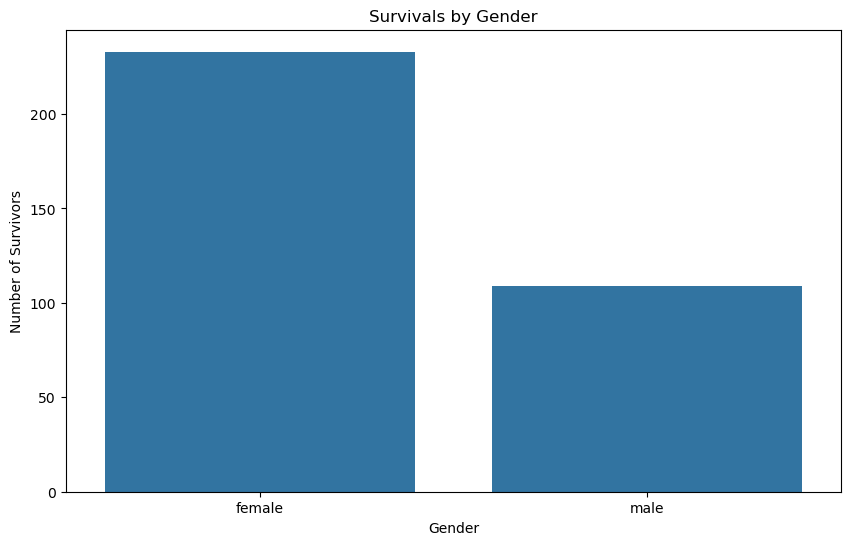

In [30]:
survived_gender = (
    titanic.groupby(["Sex", "Survived"])
    .size()
    .reset_index(name="count")
)

survived_gender = survived_gender[survived_gender["Survived"] == 1]

plt.figure(figsize=(10,6))
sns.barplot(data=survived_gender, x="Sex", y="count")
plt.title("Survivals by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Survivors")
plt.savefig("/Users/k.manjunadh/Documents/titanic-survival-analysis/outputs/figures/survival_by_gender.png", dpi=300)
plt.show()

Female passengers had a significantly higher survival rate compared to male passengers.

### 7.3 Survival Analysis by Passenger Class

This section analyzes how passenger class influenced survival outcomes.

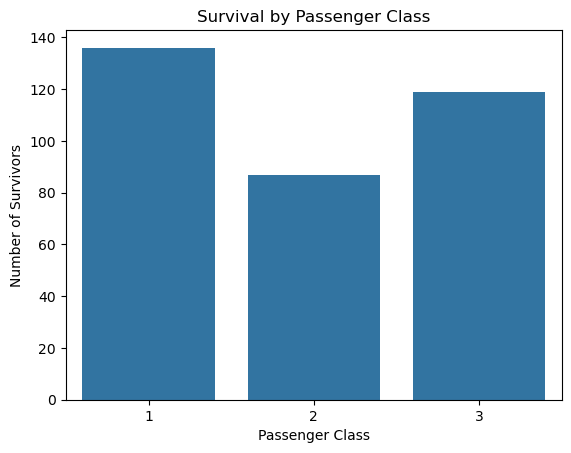

In [31]:
# Survival rate by Passenger Class
class_survival = (titanic.groupby(["Pclass","Survived"]).size().reset_index(name="count"))

class_survival = class_survival[class_survival["Survived"] == 1]

sns.barplot(data=class_survival, x="Pclass", y="count")
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Survivors")
plt.savefig("/Users/k.manjunadh/Documents/titanic-survival-analysis/outputs/figures/survival_by_Passenger Class.png", dpi=300)
plt.show()

Passengers traveling in first class had a higher chance of survival compared to those in second and third class.

### 7.4 Age Distribution of Passengers

This section visualizes the age distribution of passengers after handling missing values.

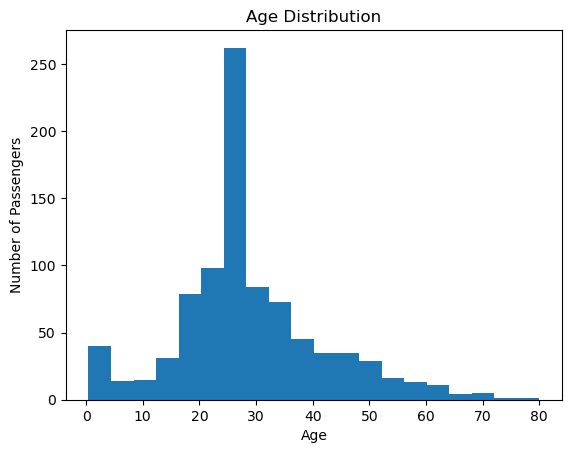

In [32]:
plt.hist(titanic["Age"], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.savefig("/Users/k.manjunadh/Documents/titanic-survival-analysis/outputs/figures/Age Distribution.png", dpi=300)
plt.show()

Most passengers were young to middle-aged adults.  
Survival appeared higher among certain middle-age groups compared to very young or elderly passengers.

### 7.5 Survival Analysis by Family Size

This analysis explores whether traveling alone or with family impacted survival chances.

In [26]:
titanic.groupby(["Survived", "FamilySize"]).size().reset_index(name="count")

,Survived,FamilySize,count
0,0,1,374
1,0,2,72
2,0,3,43
3,0,4,8
4,0,5,12
5,0,6,19
6,0,7,8
7,0,8,6
8,0,11,7
9,1,1,163


Passengers with smaller family sizes were more likely to survive compared to those traveling in larger groups.

## 8. Key Insights

Based on the exploratory data analysis, the following key insights were observed:

- Female passengers had significantly higher survival rates compared to male passengers.
- Passengers traveling in first class had better survival chances than those in second and third class.
- Survival rates varied across age groups, with certain middle-age groups showing higher survival likelihood.
- Passengers with smaller family sizes were more likely to survive compared to those traveling with large families.

## 9. Conclusion

This project demonstrates how data cleaning, feature engineering, and exploratory data analysis can be used to uncover meaningful patterns in real-world datasets.

The analysis highlights the importance of demographic and socio-economic factors in survival outcomes during the Titanic disaster.  
Overall, this project showcases practical skills in data preprocessing, analysis, and visualization using Python.

## 10. Future Work

- Build a machine learning model to predict passenger survival.
- Perform advanced feature engineering and model evaluation.
- Compare multiple classification algorithms to improve prediction accuracy.